In [1]:
               #Question two 
import pandas as pd

import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import tree
import graphviz 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


titanic = pd.read_csv('titanic3.csv')
titanic_Data = pd.DataFrame(titanic)
requiredVariable = titanic_Data.iloc[:, 0:5]
requiredVariable.drop('name',axis='columns', inplace=True)
requiredVariableArray = requiredVariable.iloc[:, 0:4].to_numpy()

#filling  in the missing values with median
requiredVariable.age.fillna((requiredVariable.age.median()), inplace = True)

#handling the sex data by converting it to categorical data which is numeric in nature 
Sex_num = pd.get_dummies(requiredVariable.sex)
model_Data = pd.concat([requiredVariable,Sex_num], axis=1)

#getting predictor and dependent variables 
x_Predictor = model_Data.drop(['survived', 'male','sex'], axis=1)
y_Predictor = model_Data.survived
crossvalidation = KFold(n_splits = x_Predictor.shape[0],
 shuffle=True, random_state=1)
#fitting and plotting the classifier 
for depth in range(1,10):
 tree_classifier = tree.DecisionTreeClassifier(
  max_depth=depth, random_state=0)
 if tree_classifier.fit(x_Predictor,y_Predictor).tree_.max_depth < depth:
    break
 score = np.mean(cross_val_score(tree_classifier, x_Predictor, y_Predictor,
  scoring='accuracy', cv=crossvalidation, n_jobs=1))
 print ('Depth: %i Classification Error: %.3f' % (depth,1-score))

#plotting the tree to a pdf titles titanic 
classes = ['Not Survived','Survived']      
dot_data = tree.export_graphviz(tree_classifier, out_file=None,
               feature_names=x_Predictor.columns,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render("titanic")   

#plotting the graph to the screen                                      
dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                      feature_names=x_Predictor.columns,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph
# Using cost complexity pruning 
path = tree_classifier.cost_complexity_pruning_path(x_Predictor, y_Predictor)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


#removing the last element because it represent the trivial tree 
ccp_alphas = ccp_alphas[:-1]
#using an alppa value  of 0.05 for pruning 
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.05)
clf.fit(x_Predictor, y_Predictor)
Test_scores = clf.score(x_Predictor, y_Predictor)
print('The test Scores are: ',1-Test_scores)

#fitting a regression model
X_train, X_test, y_train, y_test = train_test_split( x_Predictor, y_Predictor, test_size=0.33, random_state=42)
#building the model 
model2 = sm.Logit(y_train,X_train).fit()
#predicting using the model 
Y_predictions = model2.predict(X_test)
#Getting the Confusion matrix and Model Summary 
confMat = confusion_matrix(y_test, Y_predictions.round(), labels=None, sample_weight=None, normalize=None)
print(model2.summary())
print(confMat)



Depth: 1 Classification Error: 0.220
Depth: 2 Classification Error: 0.212
Depth: 3 Classification Error: 0.205
Depth: 4 Classification Error: 0.206
Depth: 5 Classification Error: 0.204
Depth: 6 Classification Error: 0.214
Depth: 7 Classification Error: 0.261
Depth: 8 Classification Error: 0.269
Depth: 9 Classification Error: 0.214
The test Scores are:  0.22001527883880823
Optimization terminated successfully.
         Current function value: 0.479570
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  877
Model:                          Logit   Df Residuals:                      874
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.2705
Time:                        14:09:12   Log-Likelihood:                -420.58
converged:                       True   LL-Null: 

 Classification Error: 0.214
For: 1 Nearest Neighbours, The In Sample Loss is: 0.193 
For: 1 Nearest Neighbours, The Out of Sample Loss is: 0.260 
For: 2 Nearest Neighbours, The In Sample Loss is: 0.200 
For: 2 Nearest Neighbours, The Out of Sample Loss is: 0.254 
For: 3 Nearest Neighbours, The In Sample Loss is: 0.182 
For: 3 Nearest Neighbours, The Out of Sample Loss is: 0.224 
For: 4 Nearest Neighbours, The In Sample Loss is: 0.192 
For: 4 Nearest Neighbours, The Out of Sample Loss is: 0.229 
For: 5 Nearest Neighbours, The In Sample Loss is: 0.183 
For: 5 Nearest Neighbours, The Out of Sample Loss is: 0.221 
For: 6 Nearest Neighbours, The In Sample Loss is: 0.192 
For: 6 Nearest Neighbours, The Out of Sample Loss is: 0.216 
For: 7 Nearest Neighbours, The In Sample Loss is: 0.192 
For: 7 Nearest Neighbours, The Out of Sample Loss is: 0.244 
For: 8 Nearest Neighbours, The In Sample Loss is: 0.212 
For: 8 Nearest Neighbours, The Out of Sample Loss is: 0.239 
For: 9 Nearest Neighbours, 

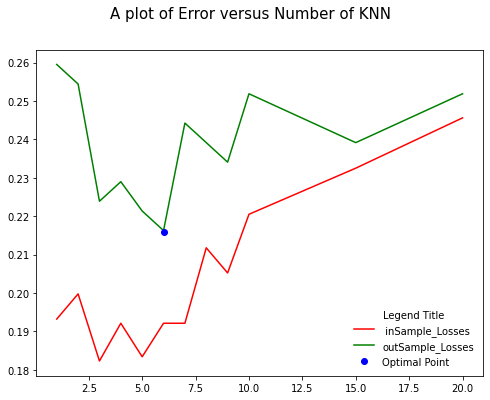

The chebyshev has an accuracy of:  0.7041484716157205
The euclidean has an accuracy of:  0.740174672489083
The mahalanobis has an accuracy of:  nan
The hamming has an accuracy of:  0.7041484716157205
[[211  38]
 [ 49  95]]


In [2]:
                        #Question Three
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.neighbors import DistanceMetric

#Question three 
knnVariable = titanic_Data.iloc[:, 0:5]
knnVariable.drop('name',axis='columns', inplace=True)
requiredVariableArray = knnVariable.iloc[:, 0:4].to_numpy()

#filling  in the missing values with median
knnVariable.age.fillna((knnVariable.age.median()), inplace = True)

#handling the sex data by converting it to categorical data which is numeric in nature 
Sex_num = pd.get_dummies(knnVariable.sex)
knn_Model_Data = pd.concat([knnVariable,Sex_num], axis=1)

#getting predictor and dependent variables 
x_Knn = knn_Model_Data.drop(['survived', 'male','sex'], axis=1)
y_Knn = knn_Model_Data.survived

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(x_Knn, y_Knn, test_size=0.3, random_state=2)

#using Kfolds cross-validation with shuffling to evaluate the model performance
crossvalidation = KFold(n_splits = x_Knn.shape[0],
 shuffle=True, random_state=1)
#building the model
knn =  KNeighborsClassifier()
knn_model_score = np.mean(cross_val_score(knn, x_Knn, y_Knn, scoring='accuracy', cv=crossvalidation, n_jobs=1))
print (' Classification Error: %.3f' %(1-score))

#fitting a knn classifier with different neighbourhood sizes 
neigh_Size = (1,2,3,4,5,6,7,8,9,10,15,20)
inSample_Losses = []
outSample_Losses = []
for neighbour in neigh_Size:
    knn2 = KNeighborsClassifier(neighbour)
    knn2.fit(X_train,y_train)
    #for in sample loss
    y_Pred_for_in_sample = knn2.predict(X_train)
    in_Sampe_Loss = metrics.accuracy_score(y_train, y_Pred_for_in_sample)
    inSample_Losses.append(1 - in_Sampe_Loss)
    print('For: %i Nearest Neighbours, The In Sample Loss is: %.3f '%(neighbour, 1-in_Sampe_Loss))
    #for out of sample sample loss
    y_Pred_for_CrossValidation = knn2.predict(X_test)
    crossvalidation_Loss =  metrics.accuracy_score(y_test, y_Pred_for_CrossValidation)
    outSample_Losses.append(1 - crossvalidation_Loss)
    print('For: %i Nearest Neighbours, The Out of Sample Loss is: %.3f '%(neighbour, 1-crossvalidation_Loss))

#initialize the plot area
optimal_KNN = [5]
optimal_Error = [0.226]
fig, ax = plt.subplots(1, figsize=(8, 6)) 
fig.suptitle('A plot of Error versus Number of KNN ', fontsize=15)
ax.plot(neigh_Size, inSample_Losses, color="red", label=" inSample_Losses ")
ax.plot(neigh_Size, outSample_Losses, color="green", label="outSample_Losses")
ax.plot(6, 0.216, 'ro',color="blue", label="Optimal Point")
plt.legend(loc="lower right", title="Legend Title", frameon=False)
plt.show()

#evaluating the performanace using distance metrics
KNN_Classifier = KNeighborsClassifier(n_neighbors = 6, metric='chebyshev')
KNN_Classifier1 = KNeighborsClassifier(n_neighbors = 6, metric='euclidean')
KNN_Classifier2 = KNeighborsClassifier(n_neighbors = 6, metric='mahalanobis')
KNN_Classifier4 = KNeighborsClassifier(n_neighbors = 6, metric='hamming')

crossvalidation1 = KFold(n_splits = X_train.shape[0],shuffle=True, random_state=1)

knn_chebyshev_score = np.mean(cross_val_score(KNN_Classifier, X_train, y_train, scoring='accuracy',        cv=crossvalidation1, n_jobs=1))
knn_euclidean_score = np.mean(cross_val_score(KNN_Classifier1, X_train, y_train, scoring='accuracy', cv=crossvalidation1, n_jobs=1))
knn_mahalanobis_score = np.mean(cross_val_score(KNN_Classifier2, X_train, y_train, scoring='accuracy', cv=crossvalidation1, n_jobs=1))
knn_hamming_score = np.mean(cross_val_score(KNN_Classifier4, X_train, y_train, scoring='accuracy', cv=crossvalidation1, n_jobs=1))

print('The chebyshev has an accuracy of: ',knn_chebyshev_score)
print('The euclidean has an accuracy of: ',knn_euclidean_score)
print('The mahalanobis has an accuracy of: ',knn_mahalanobis_score)
print('The hamming has an accuracy of: ',knn_hamming_score)

#calculating the confusion matrix for the KNN classifier 
#predicting using the model 
knn.fit(X_train,y_train)
Y_KNN_predictions = knn.predict(X_test)
#Getting the Confusion matrix and Model Summary 
confMat1 = confusion_matrix(y_test, Y_KNN_predictions.round(), labels=None, sample_weight=None, normalize=None)
print(confMat1)




In [1]:
            #Question four 
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


red_Wine_Data = pd.read_csv('winequality_red.csv',  delimiter = ";")
white_Wine_Data = pd.read_csv('winequality_white.csv',  delimiter = ";")

features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

#mean for features 
red_mean = red_Wine_Data[features].mean( axis = 0)
white_mean = white_Wine_Data[features].mean( axis = 0)

#plotting 
index = np.arange(11)
bar_width = 0.35

fig, ax = plt.subplots()
Red_Wine  = ax.bar(index, red_mean, bar_width,color="red", label="Red Wine")

White_Wine = ax.bar(index+bar_width, white_mean, bar_width, color="blue",label="White Wine")

ax.set_xlabel('Features')
ax.set_ylabel('Mean value')
ax.set_title('A plot of Features Mean Value versus Features')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"], rotation = 60, ha = "right" )
ax.legend()
plt.show()

#calculating the correlation coefficient 
red_correlation_coef = red_Wine_Data.corr()
white_correlation_coef = white_Wine_Data.corr()

print(red_correlation_coef)
print(white_correlation_coef)

lambdas = (1,2,3,4,5)
wMSEs = []
rMSEs = []
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

white_Predictor = white_Wine_Data.drop(['quality'], axis=1)
red_Predictor = red_Wine_Data.drop(['quality'], axis=1)

white_Dependent = white_Wine_Data.quality
red_Dependent = red_Wine_Data.quality

# 70% training and 30% test
wX_train, wX_test, wy_train, wy_test = train_test_split(white_Predictor, white_Dependent, test_size=0.3, random_state=2)
rX_train, rX_test, ry_train, ry_test = train_test_split(red_Predictor, red_Dependent, test_size=0.3, random_state=2)

lasso_features = white_Predictor.columns


for lambd in lambdas:
    wmodel = Lasso(lambd)
    rmodel = Lasso(lambd)

    wmodel.fit(wX_train,wy_train)
    wPred = wmodel.predict(wX_test)
    wMSEscore = mean_squared_error(wy_test,wPred)
    wMSEs.append(wMSEscore)

    rmodel.fit(rX_train,ry_train)
    rPred = rmodel.predict(rX_test)
    rMSEscore = mean_squared_error(ry_test,rPred)
    rR2_score = r2_score(ry_test,rPred)
    rMSEs.append(rMSEscore)

    wclf = wmodel.fit(wX_train,wy_train)
    wimportance = np.abs(wclf.coef_)

    rclf = rmodel.fit(rX_train,ry_train)
    rimportance = np.abs(rclf.coef_)

    widx_third = wimportance.argsort()[-3]
    ridx_third = rimportance.argsort()[-3]

    widx_features = (-wimportance).argsort()[:4]
    ridx_features = (-rimportance).argsort()[:4]
    wname_features = np.array(lasso_features)[widx_features]
    rname_features = np.array(lasso_features)[ridx_features]
    print('Selected features: {}'.format(wname_features))
    print('Selected features: {}'.format(wname_features))
    print('MSE for the Red Wine is given by: ',rMSEscore)
    print('R2 for the Red Wine is given by: ',rR2_score)

#plotting 
fig, ax = plt.subplots(1, figsize=(6, 4)) 
fig.suptitle('A plot of MSE versus Lambda ', fontsize=15)
ax.plot(lambdas, wMSEs, color="red", label=" White Wine")
ax.plot(lambdas, rMSEs, color="green", label="Red Wine")
plt.legend(loc="lower right", title="Legend Title", frameon=False)
plt.show()

#designing the KNN classifier 
lasso_KNN_Predictor = red_Wine_Data.drop(["residual sugar","chlorides","free sulfur dioxide","density","pH","sulphates","alcohol"], axis = 1)
lasso_KNN_Dependent = red_Wine_Data.quality

lasso_knn =  KNeighborsClassifier()

lasso_X_train, lasso_rX_test, lasso_ry_train, lasso_ry_test = train_test_split(lasso_KNN_Predictor, lasso_KNN_Dependent, test_size=0.3, random_state=2)

lasso_knn.fit(lasso_X_train,lasso_ry_train)
lasso_Pred = lasso_knn.predict(lasso_rX_test)
lasso_MSE = mean_squared_error(lasso_ry_test,lasso_Pred)
lasso_R2_score = r2_score(lasso_ry_test,lasso_Pred)
print (' The MSE for the KNN classifier: %.3f' %(lasso_MSE))
print (' The R2 Score for the KNN classifier: %.3f' %(lasso_R2_score))


NameError: name 'pd' is not defined